Load data from excel file

In [1]:
# Import modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.layouts import gridplot
from bokeh.io import output_notebook, show
from bokeh.models import ColumnDataSource, LinearAxis, Range1d, LabelSet
from bokeh.plotting import figure
from bokeh.palettes import Spectral4
from dython.nominal import associations

pd.set_option('display.max_columns', 100)
sns.set()
sns.set_style("white")
output_notebook()

Loading BokehJS ...

In [2]:
# Load data
dfx = pd.read_excel('../data/raw/Таблица пациентов исходы по ране.xlsx', header=None)

Recreate header and drop unnecessary rows and columns

In [3]:
cols = dfx.iloc[[0,1],].fillna(method='bfill')

In [4]:
dfx.columns = cols.iloc[0].values

In [5]:
dfx.drop([0,1], axis=0, inplace=True)

In [6]:
dfx.drop([dfx.columns[0], dfx.columns[-3], dfx.columns[-2], dfx.columns[-1]], axis=1, inplace=True)

drop  `"0" баллов`, `"1" балл`, `"2" балла`, `3+ баллов` we will recreate them later

In [7]:
dfx.drop(dfx.columns[11:15], axis=1, inplace=True)

In [8]:
dfx

,Операция,ИСХОД,Хирург,Ургентные операции,Ожирение,Сахарный диабет,ХБП,БМКШ,Атеросклероз,ХОБЛ,Сумма баллов,Викрил +,Монокрил +,Антибиотикопрофилактика,Рана,Антибиотикотерапия,Прочее (пневмония),Вторичные швы,Легенда
2,РАЛЖ МКШ ИК,0,Стёпин,0,0,1,1,0,0,0,2,0,0,ортоцид,NaN,NaN,NaN,NaN,медиастинит
3,ПрАо,0,Стёпин,0,1,0,0,0,0,0,1,0,0,цефтриаксон,NaN,NaN,NaN,NaN,вторичные швы
4,Миоэктомия МКШ,0,Стёпин,0,1,0,1,0,0,1,3,1,0,ортоцид,NaN,NaN,NaN,NaN,отделяемое
5,АМКШ ИК,0,Мамонтов,0,1,0,0,0,0,0,1,0,0,ортоцид,NaN,NaN,NaN,NaN,перевод в гнойную хирургию
6,АМКШ MAZE IV ИК,0,Мамонтов,0,1,0,0,0,0,0,1,0,0,цефуроксим,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,АМКШ ИК,NaN,Стёпин,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
730,АМКШ off pump,NaN,Стёпин,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
731,АМКШ ИК,NaN,Мамонтов,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
732,АМКШ ИК,NaN,Мамонтов,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Drop lines with NA values in a subset of columns

In [9]:
subset=list(dfx.columns[4:])
subset.remove('Прочее (пневмония)')
subset

['Ожирение',
 'Сахарный диабет',
 'ХБП',
 'БМКШ',
 'Атеросклероз',
 'ХОБЛ',
 'Сумма баллов',
 'Викрил +',
 'Монокрил +',
 'Антибиотикопрофилактика',
 'Рана',
 'Антибиотикотерапия',
 'Вторичные швы',
 'Легенда']

In [10]:
dfx.dropna(how='all', subset=subset, inplace=True)
dfx

,Операция,ИСХОД,Хирург,Ургентные операции,Ожирение,Сахарный диабет,ХБП,БМКШ,Атеросклероз,ХОБЛ,Сумма баллов,Викрил +,Монокрил +,Антибиотикопрофилактика,Рана,Антибиотикотерапия,Прочее (пневмония),Вторичные швы,Легенда
2,РАЛЖ МКШ ИК,0,Стёпин,0,0,1,1,0,0,0,2,0,0,ортоцид,NaN,NaN,NaN,NaN,медиастинит
3,ПрАо,0,Стёпин,0,1,0,0,0,0,0,1,0,0,цефтриаксон,NaN,NaN,NaN,NaN,вторичные швы
4,Миоэктомия МКШ,0,Стёпин,0,1,0,1,0,0,1,3,1,0,ортоцид,NaN,NaN,NaN,NaN,отделяемое
5,АМКШ ИК,0,Мамонтов,0,1,0,0,0,0,0,1,0,0,ортоцид,NaN,NaN,NaN,NaN,перевод в гнойную хирургию
6,АМКШ MAZE IV ИК,0,Мамонтов,0,1,0,0,0,0,0,1,0,0,цефуроксим,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,"ПлМК, АМКШ",0,Стёпин,0,1,NaN,1,0,NaN,NaN,2,NaN,NaN,ортоцид,NaN,NaN,NaN,NaN,NaN
616,АМКШ ИК,1,Спиридонов,1,0,0,0,0,0,0,1,NaN,NaN,ортоцид,Отделяемое с 6х суток п/о периода. На 14е сутк...,Левофлоксацин/Кубицин,NaN,NaN,NaN
617,БМКШ т-графт,0,Стёпин,1,1,NaN,1,1,1,NaN,5,NaN,NaN,ортоцид,NaN,NaN,NaN,NaN,NaN
618,АМКШ ИК,0,Спиридонов,0,NaN,1,1,0,NaN,NaN,2,NaN,NaN,цефтриаксон,NaN,NaN,"ВИЧ-инфекция, прогрессирование",NaN,NaN


In [11]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 618 entries, 2 to 619
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Операция                 618 non-null    object
 1   ИСХОД                    608 non-null    object
 2   Хирург                   618 non-null    object
 3   Ургентные операции       618 non-null    object
 4   Ожирение                 425 non-null    object
 5   Сахарный диабет          441 non-null    object
 6   ХБП                      552 non-null    object
 7   БМКШ                     617 non-null    object
 8   Атеросклероз             427 non-null    object
 9   ХОБЛ                     367 non-null    object
 10  Сумма баллов             617 non-null    object
 11  Викрил +                 428 non-null    object
 12  Монокрил +               287 non-null    object
 13  Антибиотикопрофилактика  617 non-null    object
 14  Рана                     44 non-null     o

`Вторичные швы` and `Легенда` have only 1 and 4 non-null values respectively.
Drop these columns.

In [12]:
dfx.drop(['Вторичные швы','Легенда'], axis=1, inplace=True)

In [13]:
dfx.describe()

,Операция,ИСХОД,Хирург,Ургентные операции,Ожирение,Сахарный диабет,ХБП,БМКШ,Атеросклероз,ХОБЛ,Сумма баллов,Викрил +,Монокрил +,Антибиотикопрофилактика,Рана,Антибиотикотерапия,Прочее (пневмония)
count,618,608,618,618,425,441,552,617,427,367,617,428,287,617,44,47,34
unique,123,2,4,2,2,2,2,2,2,2,6,2,1,23,40,31,33
top,АМКШ ИК,0,Мамонтов,0,1,1,1,0,0,0,1,0,0,цефуроксим,В п/опериоде - промокание повязки на груди сер...,Без А/Б,Интраоперационный ИМ
freq,200,560,246,533,219,227,409,528,254,282,165,417,287,155,3,9,2


Fill NA in `ИСХОД` with 0

In [14]:
dfx['ИСХОД'] = dfx['ИСХОД'].fillna(0)

dfx['ИСХОД'] = dfx[['ИСХОД']].astype('int')

In [15]:
dfx['Хирург'].unique()

array(['Стёпин', 'Мамонтов', 'Спиридонов', 'Стёпин\n'], dtype=object)

In [16]:
dfx['Хирург'] = dfx['Хирург'].str.replace('\n','')
dfx['Антибиотикопрофилактика'] = (dfx['Антибиотикопрофилактика'].str.replace(r'[\n\.\s]','')
                                                                .str.replace(r'[+\/]',',')
                                                                .str.lower()
                                 )

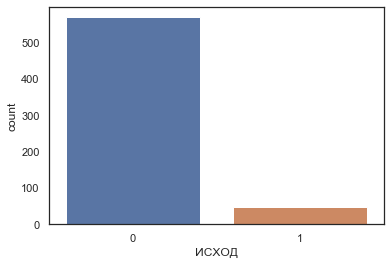

In [17]:
sns.countplot(x='ИСХОД', data=dfx, palette='deep')

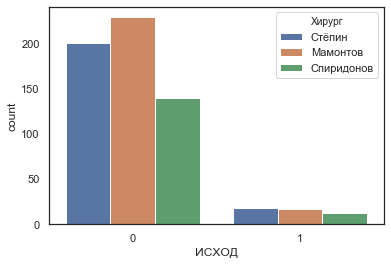

In [18]:
sns.countplot(x='ИСХОД', data=dfx, hue='Хирург', palette='deep')

In [19]:
cols = list(dfx.columns[3:10]) + list(dfx.columns[11:13])

In [20]:
dfx[cols] = dfx[cols].fillna(0)

In [21]:
dfx[cols] = dfx[cols].astype('int')

In [22]:
cols[0:7]

['Ургентные операции',
 'Ожирение',
 'Сахарный диабет',
 'ХБП',
 'БМКШ',
 'Атеросклероз',
 'ХОБЛ']

In [23]:
dfx['Сумма баллов'] = 0

for i in cols[0:7]:
    dfx['Сумма баллов'] = dfx['Сумма баллов'] + dfx[i]
dfx

,Операция,ИСХОД,Хирург,Ургентные операции,Ожирение,Сахарный диабет,ХБП,БМКШ,Атеросклероз,ХОБЛ,Сумма баллов,Викрил +,Монокрил +,Антибиотикопрофилактика,Рана,Антибиотикотерапия,Прочее (пневмония)
2,РАЛЖ МКШ ИК,0,Стёпин,0,0,1,1,0,0,0,2,0,0,ортоцид,NaN,NaN,NaN
3,ПрАо,0,Стёпин,0,1,0,0,0,0,0,1,0,0,цефтриаксон,NaN,NaN,NaN
4,Миоэктомия МКШ,0,Стёпин,0,1,0,1,0,0,1,3,1,0,ортоцид,NaN,NaN,NaN
5,АМКШ ИК,0,Мамонтов,0,1,0,0,0,0,0,1,0,0,ортоцид,NaN,NaN,NaN
6,АМКШ MAZE IV ИК,0,Мамонтов,0,1,0,0,0,0,0,1,0,0,цефуроксим,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,"ПлМК, АМКШ",0,Стёпин,0,1,0,1,0,0,0,2,0,0,ортоцид,NaN,NaN,NaN
616,АМКШ ИК,1,Спиридонов,1,0,0,0,0,0,0,1,0,0,ортоцид,Отделяемое с 6х суток п/о периода. На 14е сутк...,Левофлоксацин/Кубицин,NaN
617,БМКШ т-графт,0,Стёпин,1,1,0,1,1,1,0,5,0,0,ортоцид,NaN,NaN,NaN
618,АМКШ ИК,0,Спиридонов,0,0,1,1,0,0,0,2,0,0,цефтриаксон,NaN,NaN,"ВИЧ-инфекция, прогрессирование"


In [24]:
dfx['Points'] = dfx['Сумма баллов'].astype(str)

In [25]:
dfx = pd.get_dummies(dfx, columns=['Points'], drop_first=True)

In [26]:
dfx

,Операция,ИСХОД,Хирург,Ургентные операции,Ожирение,Сахарный диабет,ХБП,БМКШ,Атеросклероз,ХОБЛ,Сумма баллов,Викрил +,Монокрил +,Антибиотикопрофилактика,Рана,Антибиотикотерапия,Прочее (пневмония),Points_1,Points_2,Points_3,Points_4,Points_5
2,РАЛЖ МКШ ИК,0,Стёпин,0,0,1,1,0,0,0,2,0,0,ортоцид,NaN,NaN,NaN,0,1,0,0,0
3,ПрАо,0,Стёпин,0,1,0,0,0,0,0,1,0,0,цефтриаксон,NaN,NaN,NaN,1,0,0,0,0
4,Миоэктомия МКШ,0,Стёпин,0,1,0,1,0,0,1,3,1,0,ортоцид,NaN,NaN,NaN,0,0,1,0,0
5,АМКШ ИК,0,Мамонтов,0,1,0,0,0,0,0,1,0,0,ортоцид,NaN,NaN,NaN,1,0,0,0,0
6,АМКШ MAZE IV ИК,0,Мамонтов,0,1,0,0,0,0,0,1,0,0,цефуроксим,NaN,NaN,NaN,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,"ПлМК, АМКШ",0,Стёпин,0,1,0,1,0,0,0,2,0,0,ортоцид,NaN,NaN,NaN,0,1,0,0,0
616,АМКШ ИК,1,Спиридонов,1,0,0,0,0,0,0,1,0,0,ортоцид,Отделяемое с 6х суток п/о периода. На 14е сутк...,Левофлоксацин/Кубицин,NaN,1,0,0,0,0
617,БМКШ т-графт,0,Стёпин,1,1,0,1,1,1,0,5,0,0,ортоцид,NaN,NaN,NaN,0,0,0,0,1
618,АМКШ ИК,0,Спиридонов,0,0,1,1,0,0,0,2,0,0,цефтриаксон,NaN,NaN,"ВИЧ-инфекция, прогрессирование",0,1,0,0,0


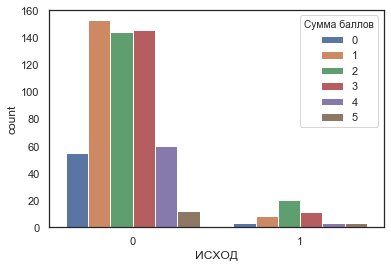

In [27]:
sns.countplot(x='ИСХОД', data=dfx, hue='Сумма баллов', palette='deep')

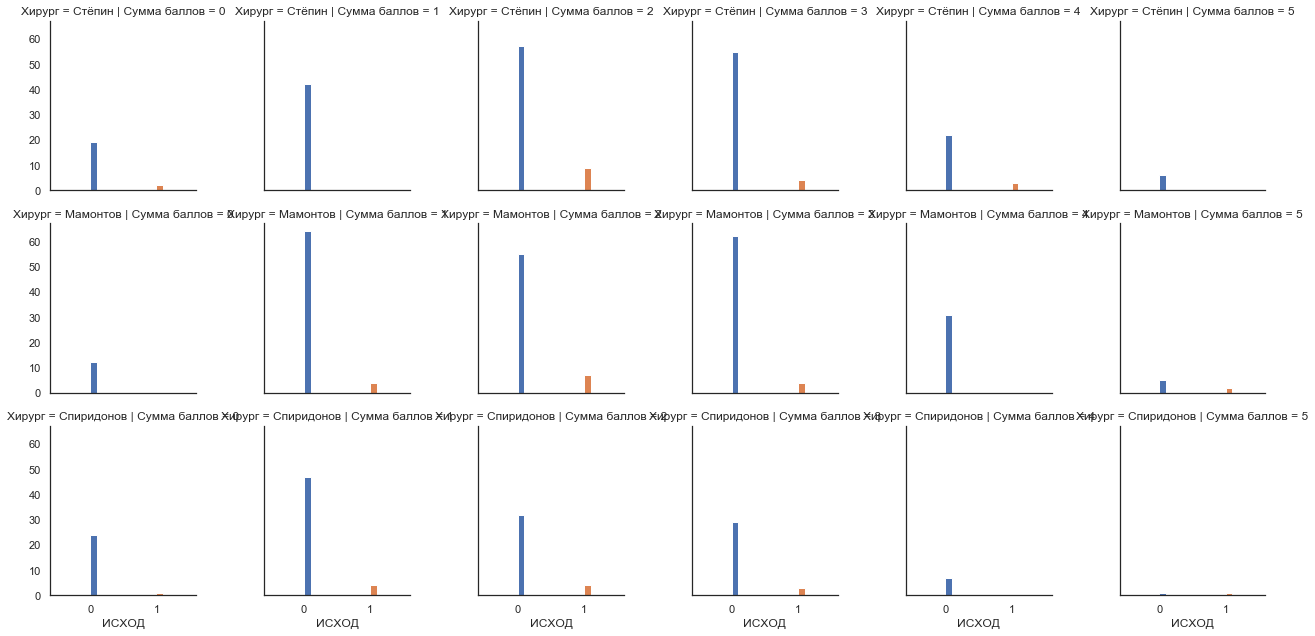

In [28]:
g = sns.FacetGrid(dfx, col='Сумма баллов',  row='Хирург', hue='ИСХОД')
g = g.map(plt.hist, 'ИСХОД')

In [29]:
data = (dfx.groupby(['Сумма баллов','Хирург']).agg(target_percent=('ИСХОД','mean'), target_abs=('ИСХОД','sum'), 
                                                   target_total=('ИСХОД','size')).reset_index())
data['target_percent'] = (data['target_percent']*100).round(1)
data

,Сумма баллов,Хирург,target_percent,target_abs,target_total
0,0,Мамонтов,0.0,0,12
1,0,Спиридонов,4.0,1,25
2,0,Стёпин,9.5,2,21
3,1,Мамонтов,5.9,4,68
4,1,Спиридонов,7.8,4,51
5,1,Стёпин,0.0,0,42
6,2,Мамонтов,11.3,7,62
7,2,Спиридонов,11.1,4,36
8,2,Стёпин,13.6,9,66
9,3,Мамонтов,6.1,4,66


In [30]:
surgeons = dfx['Хирург'].unique()
# list of figures
p_list = [];
for idx, surgeon in enumerate(surgeons):
    source = ColumnDataSource(data={
                                    'x'       : data.loc[data['Хирург']==surgeons[idx],'Сумма баллов'],
                                    'y1'      : data.loc[data['Хирург']==surgeons[idx],'target_percent'],
                                    'y2'      : data.loc[data['Хирург']==surgeons[idx],'target_total'],
                                    'surgeon' : data.loc[data['Хирург']==surgeons[idx],'Хирург'],}
                             )
    # Save the minimum and maximum values of the `Cумма баллов` column: xmin1, xmax1
    xmin, xmax = min(source.data['x']), max(source.data['x'])

    # Save the minimum and maximum values of the `target_percent` column: y1min1, y1max1
    y1min, y1max = min(source.data['y1']), max(source.data['y1'])

    # Save the minimum and maximum values of the `target_percent` column: y2min1, y2max1
    y2min, y2max = min(source.data['y2']), max(source.data['y2'])

    # Create figure
    p = figure(y_axis_label='Outcome percent, %', x_axis_label='Number of points',
               plot_height=300, plot_width=400, x_range = (xmin-0.5, xmax+0.5), y_range = (y1min-3, y1max+5))
    
    # Change label text color
    p.yaxis.major_label_text_color = Spectral4[0]

    # Add extra y-axis
    p.extra_y_ranges = {'y2': Range1d(start=y2min-3, end=y2max+5)}
    p.add_layout(LinearAxis(y_range_name='y2', axis_label='Number of patients', 
                            major_label_text_color = Spectral4[1]), 'right')

    # Add lines
    p.line(x='x', y='y1', source=source, line_alpha=0.8, line_color=Spectral4[0], line_width=2)
    p.line(x='x', y='y2', source=source, line_alpha=0.8, line_color=Spectral4[1], line_width=2, y_range_name='y2')
    
    # Add Circles
    p.circle(x='x', y='y1', source=source, size=8, color=Spectral4[0], alpha=0.4, 
             line_color = 'black', line_alpha = 0.5)
    p.circle(x='x', y='y2', source=source, size=8, color=Spectral4[1], alpha=0.4, 
             line_color = 'black', line_alpha = 0.5, y_range_name='y2')
    
    # Add labels
    labels = LabelSet(x='x', y='y1', text='y1', level='glyph',
                      x_offset=5, y_offset=5, source=source, render_mode='canvas', 
                      text_font_size='8pt', text_alpha=0.6)
    p.add_layout(labels)
    
    labels = LabelSet(x='x', y='y2', text='y2', level='glyph',
                      x_offset=5, y_offset=5, source=source, render_mode='canvas', 
                      text_font_size='8pt', text_alpha=0.6, y_range_name = 'y2')
    p.add_layout(labels)
    

    # Add title and other stuff
    p.title.text = 'Surgeon: {}'.format(surgeon)
    p.toolbar.logo = None 
    p.toolbar_location = None
    p.xgrid.visible = False 
    p.ygrid.visible = False
    if idx>0:
        p.xaxis.axis_label = None
        p.yaxis.axis_label = ' '    # Reserve space
    
    # Append list of figures
    p_list.append(p)

#show(p)
grid = gridplot(p_list, ncols=2)
show(grid)


Calculate the correlation/strength-of-association of features Cramer's V 

In [31]:
cols = list(dfx.columns[2:10]) + list(dfx.columns[-5:])
cols.extend([dfx.columns[11],dfx.columns[1]])
cols

['Хирург',
 'Ургентные операции',
 'Ожирение',
 'Сахарный диабет',
 'ХБП',
 'БМКШ',
 'Атеросклероз',
 'ХОБЛ',
 'Points_1',
 'Points_2',
 'Points_3',
 'Points_4',
 'Points_5',
 'Викрил +',
 'ИСХОД']

In [32]:
df = dfx[cols].copy()
df

,Хирург,Ургентные операции,Ожирение,Сахарный диабет,ХБП,БМКШ,Атеросклероз,ХОБЛ,Points_1,Points_2,Points_3,Points_4,Points_5,Викрил +,ИСХОД
2,Стёпин,0,0,1,1,0,0,0,0,1,0,0,0,0,0
3,Стёпин,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,Стёпин,0,1,0,1,0,0,1,0,0,1,0,0,1,0
5,Мамонтов,0,1,0,0,0,0,0,1,0,0,0,0,0,0
6,Мамонтов,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,Стёпин,0,1,0,1,0,0,0,0,1,0,0,0,0,0
616,Спиридонов,1,0,0,0,0,0,0,1,0,0,0,0,0,1
617,Стёпин,1,1,0,1,1,1,0,0,0,0,0,1,0,0
618,Спиридонов,0,0,1,1,0,0,0,0,1,0,0,0,0,0


In [33]:
corr=associations(df, nominal_columns='all', mark_columns=False, theil_u=False, plot=False, return_results=True)

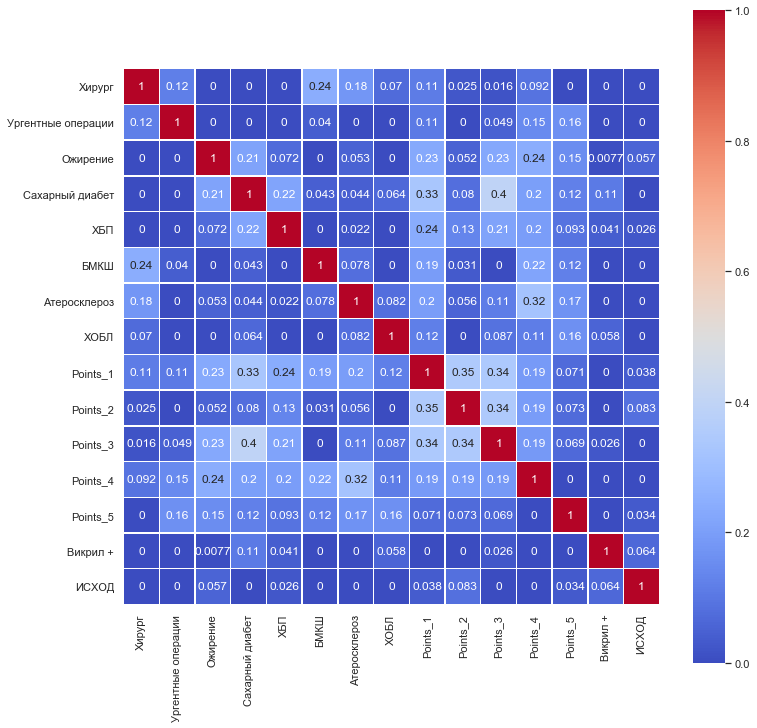

In [34]:
plt.figure(figsize=(12,12))
plt.title = 'Correlation of features'
sns.heatmap(corr,annot=True,linewidth = 0.5, cmap='coolwarm', square=True)


Rename `Антибиотикопрофилактика` to English equivalent Preoperative Antibiotic Prophylaxis (PAP) or `pap`

In [35]:
cols = dfx.columns.values
cols[13] = 'pap'
dfx.columns = cols

In [36]:
dfx = pd.concat([dfx, dfx.pap.str.get_dummies(sep=',')], axis=1)

In [37]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 618 entries, 2 to 619
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Операция            618 non-null    object
 1   ИСХОД               618 non-null    int32 
 2   Хирург              618 non-null    object
 3   Ургентные операции  618 non-null    int32 
 4   Ожирение            618 non-null    int32 
 5   Сахарный диабет     618 non-null    int32 
 6   ХБП                 618 non-null    int32 
 7   БМКШ                618 non-null    int32 
 8   Атеросклероз        618 non-null    int32 
 9   ХОБЛ                618 non-null    int32 
 10  Сумма баллов        618 non-null    int64 
 11  Викрил +            618 non-null    int32 
 12  Монокрил +          618 non-null    int32 
 13  pap                 617 non-null    object
 14  Рана                44 non-null     object
 15  Антибиотикотерапия  47 non-null     object
 16  Прочее (пневмония)  34 non

In [38]:
cols = list(dfx.columns[2:10]) + list(dfx.columns[-16:])
cols.extend([dfx.columns[11],dfx.columns[1]])
cols

['Хирург',
 'Ургентные операции',
 'Ожирение',
 'Сахарный диабет',
 'ХБП',
 'БМКШ',
 'Атеросклероз',
 'ХОБЛ',
 'Points_1',
 'Points_2',
 'Points_3',
 'Points_4',
 'Points_5',
 'аксетин',
 'ванкомицин',
 'зинацеф',
 'кубицин',
 'линезолид',
 'ортоцид',
 'сульперазон',
 'цефоперазон',
 'цефроксим',
 'цефтриаксон',
 'цефуроксим',
 'Викрил +',
 'ИСХОД']

In [39]:
df = dfx[cols].copy()
df.head()

,Хирург,Ургентные операции,Ожирение,Сахарный диабет,ХБП,БМКШ,Атеросклероз,ХОБЛ,Points_1,Points_2,Points_3,Points_4,Points_5,аксетин,ванкомицин,зинацеф,кубицин,линезолид,ортоцид,сульперазон,цефоперазон,цефроксим,цефтриаксон,цефуроксим,Викрил +,ИСХОД
2,Стёпин,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Стёпин,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Стёпин,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
5,Мамонтов,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,Мамонтов,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


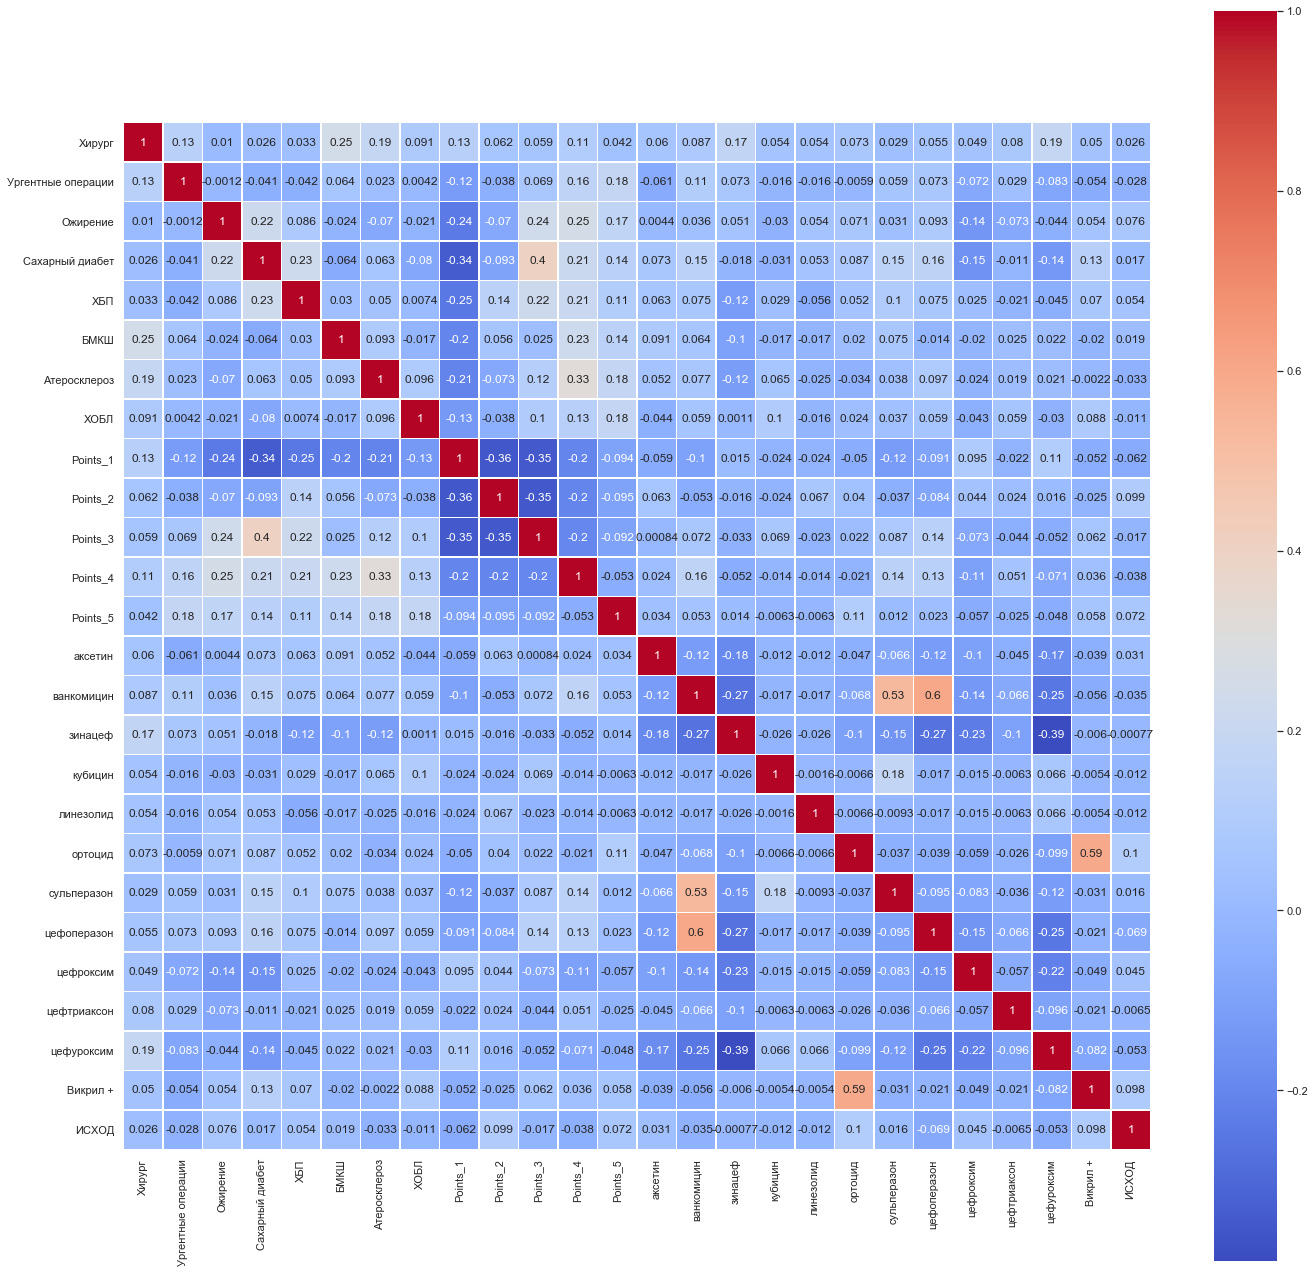

In [40]:
corr=associations(df, nominal_columns='auto', mark_columns=False, theil_u=False, plot=False, return_results=True)

plt.figure(figsize=(23,23))
plt.title = 'Correlation of features'
sns.heatmap(corr,annot=True,linewidth = 0.5, cmap='coolwarm', square=True)

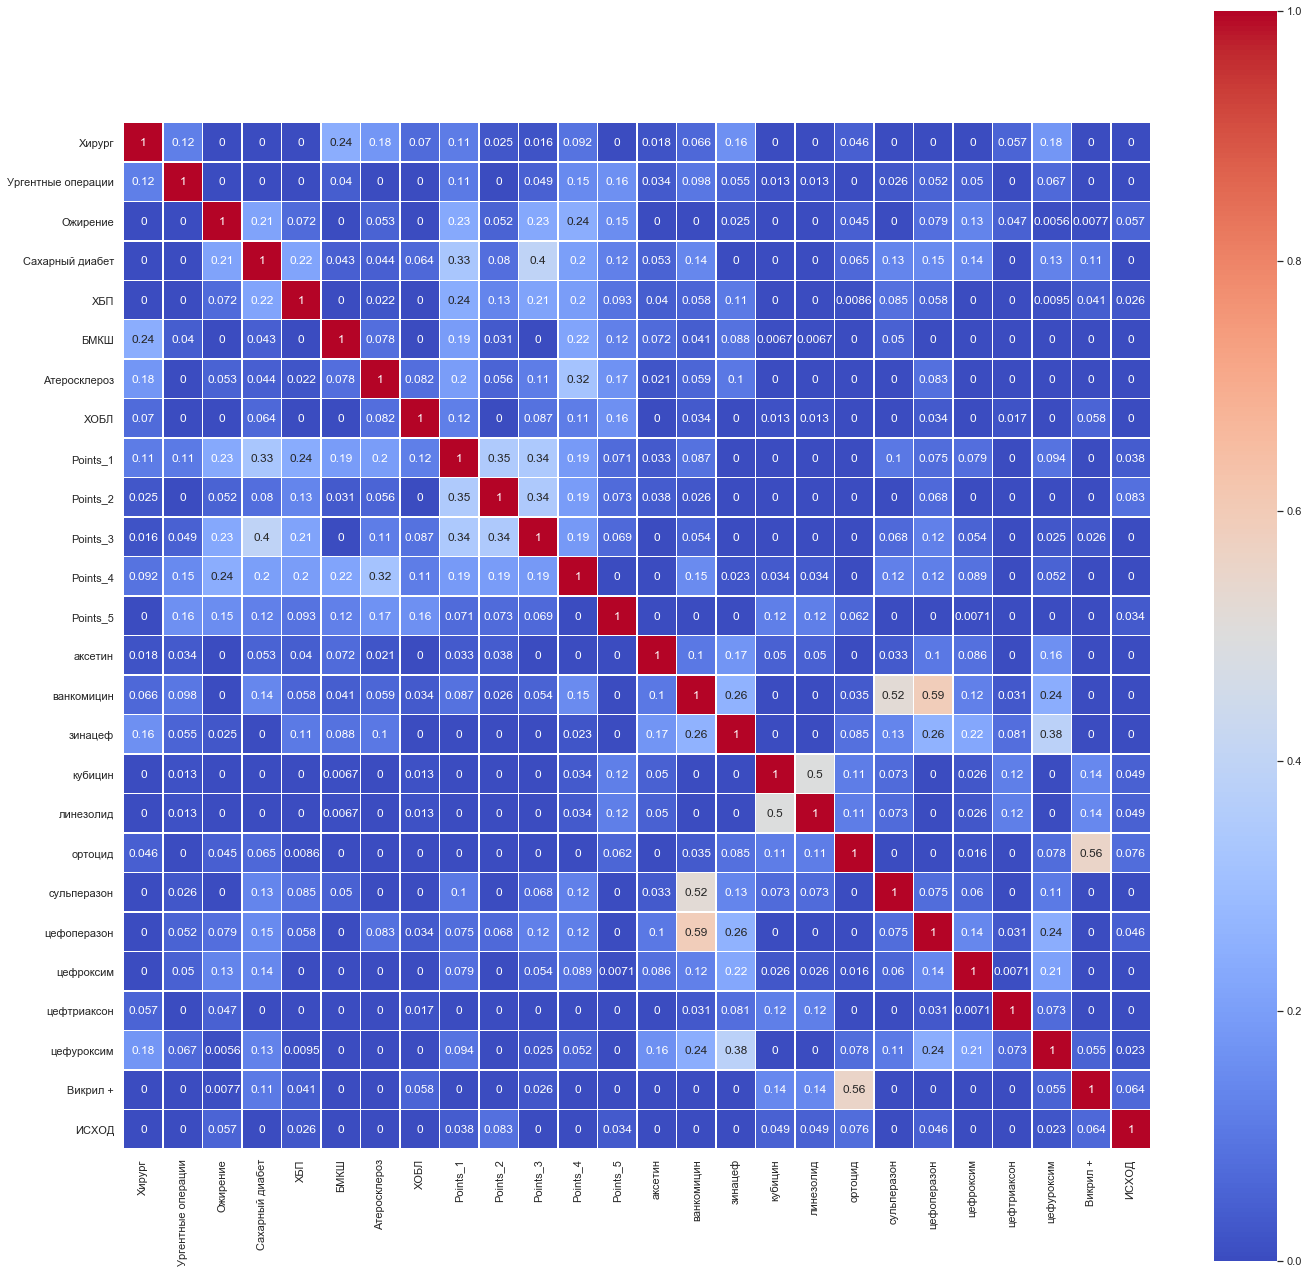

In [41]:
corr=associations(df, nominal_columns='all', mark_columns=False, theil_u=False, plot=False, return_results=True)

plt.figure(figsize=(23,23))
plt.title = 'Correlation of features'
sns.heatmap(corr,annot=True,linewidth = 0.5, cmap='coolwarm', square=True)

Make dummy columns from surgeon column

In [42]:
dfx = pd.concat([dfx, dfx['Хирург'].str.get_dummies(sep=',')], axis=1)
dfx.describe()

,ИСХОД,Ургентные операции,Ожирение,Сахарный диабет,ХБП,БМКШ,Атеросклероз,ХОБЛ,Сумма баллов,Викрил +,Монокрил +,Points_1,Points_2,Points_3,Points_4,Points_5,аксетин,ванкомицин,зинацеф,кубицин,линезолид,ортоцид,сульперазон,цефоперазон,цефроксим,цефтриаксон,цефуроксим,Мамонтов,Спиридонов,Стёпин
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.0,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,0.077670,0.137540,0.354369,0.367314,0.661812,0.144013,0.279935,0.137540,2.082524,0.017799,0.0,0.260518,0.265372,0.254045,0.101942,0.024272,0.076052,0.147249,0.292880,0.001618,0.001618,0.025890,0.050162,0.147249,0.116505,0.024272,0.268608,0.398058,0.247573,0.354369
std,0.267868,0.344696,0.478709,0.482464,0.473476,0.351387,0.449331,0.344696,1.229560,0.132329,0.0,0.439273,0.441889,0.435676,0.302817,0.154017,0.265296,0.354641,0.455453,0.040226,0.040226,0.158936,0.218456,0.354641,0.321089,0.154017,0.443595,0.489894,0.431952,0.478709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Surgery types

In [43]:
dfx.head()

,Операция,ИСХОД,Хирург,Ургентные операции,Ожирение,Сахарный диабет,ХБП,БМКШ,Атеросклероз,ХОБЛ,Сумма баллов,Викрил +,Монокрил +,pap,Рана,Антибиотикотерапия,Прочее (пневмония),Points_1,Points_2,Points_3,Points_4,Points_5,аксетин,ванкомицин,зинацеф,кубицин,линезолид,ортоцид,сульперазон,цефоперазон,цефроксим,цефтриаксон,цефуроксим,Мамонтов,Спиридонов,Стёпин
2,РАЛЖ МКШ ИК,0,Стёпин,0,0,1,1,0,0,0,2,0,0,ортоцид,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,ПрАо,0,Стёпин,0,1,0,0,0,0,0,1,0,0,цефтриаксон,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,Миоэктомия МКШ,0,Стёпин,0,1,0,1,0,0,1,3,1,0,ортоцид,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
5,АМКШ ИК,0,Мамонтов,0,1,0,0,0,0,0,1,0,0,ортоцид,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
6,АМКШ MAZE IV ИК,0,Мамонтов,0,1,0,0,0,0,0,1,0,0,цефуроксим,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [44]:
dfx['Операция'].value_counts()

АМКШ ИК                           200
АМКШ off pump                      80
БМКШ т-графт                       39
МКШ off pump                       37
МКШ                                24
                                 ... 
Миоэктомия, ПлМК, АКШ ВТК           1
МКШJ- графт ИК                      1
супракоронарное протезирование      1
АМКШ Maze IV ИК                     1
МКШ J-графт off pump                1
Name: Операция, Length: 123, dtype: int64

In [45]:
dfx['surgery_type'] = (dfx['Операция'].str.strip()
                       .str.lower()
                       .str.replace(r'off pump|Off pump', 'off_pump')
                       .str.replace(r'maze iv', 'maze_iv')
                       .str.replace(r'пластика мк|пластика митрального клапана|пластика мк', 'плмк')
                       .str.replace(r'пластика левого желудочка', 'пл_лев_жел')
                       .str.replace(r'операция беталла|операция бенталла', 'оп_бенталла')
                       .str.replace(r'операция david', 'оп_david')
                       .str.replace(r'пластика аортального клапана', 'пак')                                
                       .str.replace(r'протезирование ак', 'пр_ак')                                
                       .str.replace(r'протезирование мк', 'пр_мк')                                
                       .str.replace(r'операция морроу|операция morrow', 'оп_морроу')
                       .str.replace(r'box lesion', 'box_lesion')
                       .str.replace(r'механика', 'мех')
                       .str.replace(r'супракоронарное протезирвоание|супракоронарное протезирование', 
                                    'супракор_прот')
                       .str.replace(r'протезирование восходящей аорты', 'прот_восх_аорты')
                       .str.replace(r'j- графт', ' j-графт')
                       .str.replace(r'миксома лп|удаление миксомы лп|миксома|удаление опухоли', 'миксома')
                       .str.replace(r'пр ао', 'прао')
                       .str.replace(r'[\(\)\.]|( 27мм)', '')
                       .str.replace(r'[+//]', ' ')
                       .str.replace(r',\s{1,}', ',')
                       .str.replace(r'\s{1,}', ',')
                       )

In [46]:
dfx['surgery_type'].unique()

array(['ралж,мкш,ик', 'прао', 'миоэктомия,мкш', 'амкш,ик',
       'амкш,maze_iv,ик', 'мкш,off_pump', 'бмкш,т-графт',
       'плмк,мкш,maze_iv', 'амкш,off_pump', 'миоэктомия,пл_лев_жел,ик',
       'бмкш', 'freestyle,мкш', 'амкш,maze,ик', 'плмк,амкш',
       'оп_бенталла,амкш,maze_iv', 'бмкш,maze_iv,off_pump',
       'амкш,maze_iv,off_pump', 'бмкш,off_pump', 'мкш,j-графт,off_pump',
       'оп_морроу', 'бмкш,т-графт,off_pump', 'freestyle,maze_iv,мкш',
       'пак,амкш', 'мкш', 'амкш,плмк', 'пмк,био', 'миоэктомия,плмк',
       'пр_мк', 'пак', 'пак,мех', 'миоэктомия,плмк,бмкш',
       'пак,мех,миоэктомия,амкш', 'миоэктомия,плмк,акш,втк',
       'амкш,pvi,off_pump', 'плмк', 'пак,био',
       'мкш,maze_iv,box_lesion,ик', 'freestyle,прот_восх_аорты',
       'плдмжп,амкш', 'пмк,био,амкш,maze_iv', 'миксома', 'мкш,maze_iv,ик',
       'пак,био,амкш', 'плмк,амкш,супракор_прот',
       'рестернотомия,плтк,тромбэктомия,лп,амкш', 'пр_ак',
       'ралж,тромбэктомия,амкш', 'пак,био,амкш,миоэктомия,втлж'

In [47]:
dfx['surgery_type'].value_counts()

амкш,ик                          208
амкш,off_pump                     98
бмкш,т-графт                      39
мкш,off_pump                      37
мкш                               24
                                ... 
бмкш,т-графт,maze_iv,off_pump      1
плмк,ралж,амкш                     1
мкш,maze_iv,ик                     1
freestyle,прот_восх_аорты          1
оп_морроу,maze_iv                  1
Name: surgery_type, Length: 103, dtype: int64

In [48]:
dfx = pd.concat([dfx, dfx.surgery_type.str.get_dummies(sep=',')], axis=1)

In [49]:
dfx.mean()>=0.05

ИСХОД                  True
Ургентные операции     True
Ожирение               True
Сахарный диабет        True
ХБП                    True
                      ...  
репмк                 False
рестернотомия         False
супракор_прот         False
т-графт                True
тромбэктомия          False
Length: 70, dtype: bool

Select only features with more than 5% ones

In [54]:
#df = dfx.select_dtypes(include='number').loc[:,(dfx.loc[:].mean()>=0.01)]
df = dfx.select_dtypes(include='number').copy()

In [55]:
df.head()

,ИСХОД,Ургентные операции,Ожирение,Сахарный диабет,ХБП,БМКШ,Атеросклероз,ХОБЛ,Сумма баллов,Викрил +,Монокрил +,Points_1,Points_2,Points_3,Points_4,Points_5,аксетин,ванкомицин,зинацеф,кубицин,линезолид,ортоцид,сульперазон,цефоперазон,цефроксим,цефтриаксон,цефуроксим,Мамонтов,Спиридонов,Стёпин,box_lesion,freestyle,j-графт,maze,maze_iv,medtronic,off_pump,pvi,акш,амкш,био,бмкш,втк,втлж,ик,лп,мех,миксома,миоэктомия,мкш,оп_david,оп_бенталла,оп_морроу,пак,пл_лев_жел,плдмжп,плмк,плтк,пмк,пр_ак,пр_мк,прао,прот_восх_аорты,пртк,ралж,репмк,рестернотомия,супракор_прот,т-графт,тромбэктомия
2,0,0,0,1,1,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,1,3,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
df.drop('Монокрил +', axis=1, inplace=True)

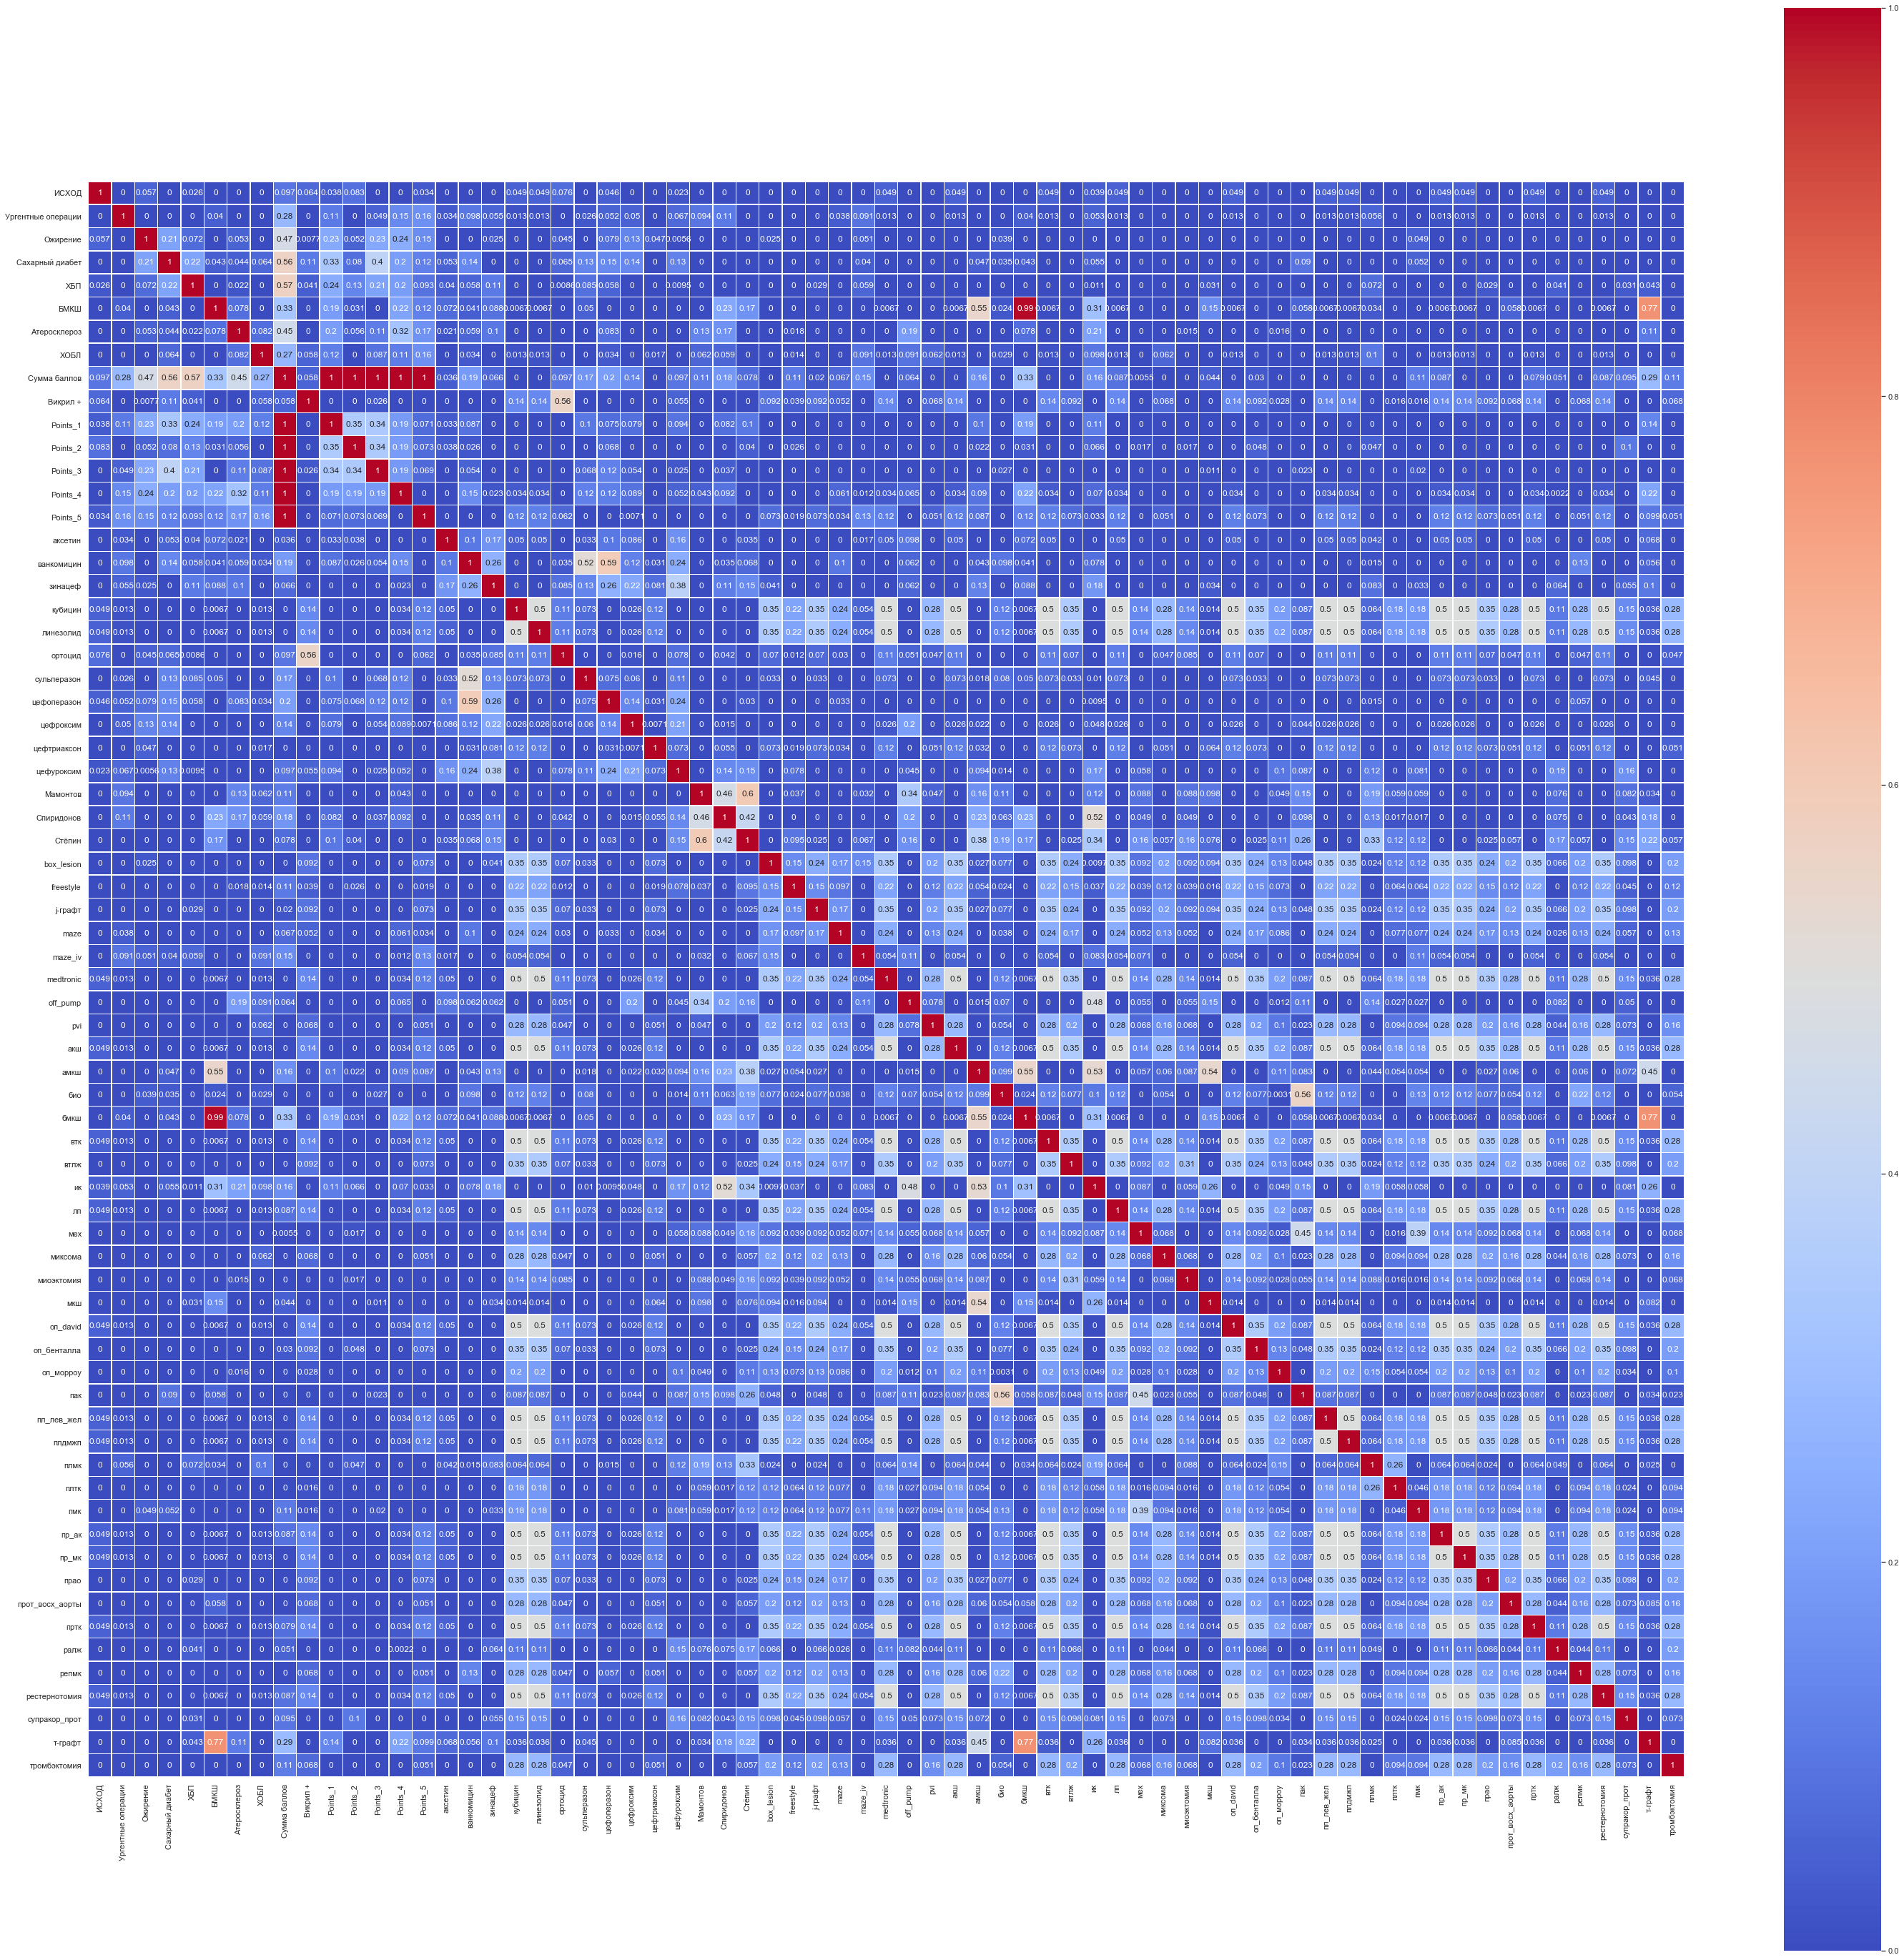

In [59]:
corr=associations(df, nominal_columns='all', mark_columns=False, theil_u=False, plot=False, return_results=True)

plt.figure(figsize=(50,50))
plt.title = 'Correlation of features'
sns.heatmap(corr,annot=True,linewidth = 0.5, cmap='coolwarm', square=True)

In [53]:
corr

,ИСХОД,Ургентные операции,Ожирение,Сахарный диабет,ХБП,БМКШ,Атеросклероз,ХОБЛ,Сумма баллов,Викрил +,Монокрил +,Points_1,Points_2,Points_3,Points_4,Points_5,аксетин,ванкомицин,зинацеф,кубицин,линезолид,ортоцид,сульперазон,цефоперазон,цефроксим,цефтриаксон,цефуроксим,Мамонтов,Спиридонов,Стёпин,box_lesion,freestyle,j-графт,maze,maze_iv,medtronic,off_pump,pvi,акш,амкш,био,бмкш,втк,втлж,ик,лп,мех,миксома,миоэктомия,мкш,оп_david,оп_бенталла,оп_морроу,пак,пл_лев_жел,плдмжп,плмк,плтк,пмк,пр_ак,пр_мк,прао,прот_восх_аорты,пртк,ралж,репмк,рестернотомия,супракор_прот,т-графт,тромбэктомия
ИСХОД,1.000000,-0.028119,0.075713,0.017168,0.054093,0.018724,-0.032814,-0.010566,0.039558,0.098106,NaN,-0.062050,0.099436,-0.016584,-0.037828,0.072086,0.030778,-0.035281,-0.000774,-0.011683,-0.011683,0.104967,0.016403,-0.069403,0.045371,-0.006484,-0.053102,-0.026020,0.015639,0.012517,-0.016535,-0.026208,-0.016535,-0.023422,-0.009815,-0.011683,-0.041425,-0.020268,-0.011683,0.032358,0.037080,0.018724,-0.011683,-0.016535,0.062440,-0.011683,-0.039065,-0.020268,0.006659,-0.026889,-0.011683,-0.016535,-0.028733,-0.027039,-0.011683,-0.011683,0.031074,0.026069,0.026069,-0.011683,-0.011683,-0.016535,-0.020268,-0.011683,0.025121,-0.020268,-0.011683,-0.037216,-0.035225,-0.020268
Ургентные операции,-0.028119,1.000000,-0.001192,-0.041143,-0.042246,0.063679,0.023079,0.004216,0.275279,-0.053759,NaN,-0.119285,-0.037845,0.069137,0.160475,0.181247,-0.061401,0.112481,0.073352,-0.016077,-0.016077,-0.005936,0.058894,0.072706,-0.071797,0.028602,-0.083014,0.107161,-0.120215,-0.001192,0.059965,-0.036066,-0.022755,0.084942,0.108673,-0.016077,0.009432,0.039704,-0.016077,0.002927,0.002350,0.063679,-0.016077,0.059965,0.071510,-0.016077,-0.053759,0.039704,0.017306,-0.021296,-0.016077,-0.022755,-0.039541,-0.031636,-0.016077,0.100812,-0.079261,-0.042744,-0.042744,-0.016077,0.100812,-0.022755,-0.027891,-0.016077,-0.038439,0.039704,-0.016077,-0.051215,0.009609,-0.027891
Ожирение,0.075713,-0.001192,1.000000,0.221458,0.086259,-0.024462,-0.070118,-0.020836,0.470657,0.053779,NaN,-0.239342,-0.069849,0.235961,0.253516,0.168923,0.004398,0.035823,0.050989,-0.029826,0.054340,0.070938,0.031222,0.093104,-0.142501,-0.072883,-0.044460,-0.008119,-0.001712,0.009853,0.076911,0.008616,-0.042214,0.024574,0.071140,-0.029826,0.018751,-0.003072,-0.029826,0.024775,-0.067322,-0.024462,-0.029826,0.017348,0.038299,-0.029826,-0.048562,-0.003072,0.028193,0.002300,-0.029826,0.017348,0.030146,-0.026350,0.054340,-0.029826,0.017949,-0.047331,-0.079298,-0.029826,-0.029826,0.017348,0.045601,0.054340,-0.041868,-0.003072,-0.029826,-0.014577,-0.029676,-0.051744
Сахарный диабет,0.017168,-0.041143,0.221458,1.000000,0.225398,-0.063966,0.063209,-0.080126,0.536226,0.125904,NaN,-0.337539,-0.093047,0.403508,0.209216,0.141562,0.072635,0.147528,-0.018320,-0.030675,0.052836,0.087144,0.147829,0.157000,-0.151144,-0.011117,-0.136117,-0.023035,0.021783,0.003918,0.015683,0.006124,0.015683,0.022216,0.063152,-0.030675,-0.043069,-0.004923,0.052836,0.065244,0.064462,-0.063966,0.052836,0.015683,0.071246,-0.030675,-0.001027,-0.053217,-0.051799,-0.008368,0.052836,0.015683,0.027253,0.107446,-0.030675,0.052836,-0.046193,-0.018118,-0.081555,-0.030675,-0.030675,-0.043416,0.043370,0.052836,-0.025537,-0.004923,-0.030675,0.008696,-0.038332,-0.053217
ХБП,0.054093,-0.042246,0.086259,0.225398,1.000000,0.030186,0.049567,0.007408,0.524079,0.070363,NaN,-0.245871,0.143021,0.220744,0.206931,0.112745,0.063157,0.075047,-0.118659,0.028779,-0.056318,0.051927,0.101598,0.075047,0.025048,-0.020607,-0.045226,-0.005631,-0.025813,0.029054,-0.019489,-0.049980,-0.079710,0.057698,0.078211,-0.056318,-0.024481,0.000717,0.028779,0.021346,-0.006100,0.030186,0.028779,0.040732,-0.045357,-0.056318,-0.007241,0.000717,-0.033109,-0.055812,0.028779,0.040732,0.035898,-0.033344,-0.056318,0.028779,0.090170,0.044193,-0.020449,-0.056318,-0.056318,-0.079710,0.000717,0.028779,-0.067980,0.049927,-0.056318,0.064569,0.064555,-0.048494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

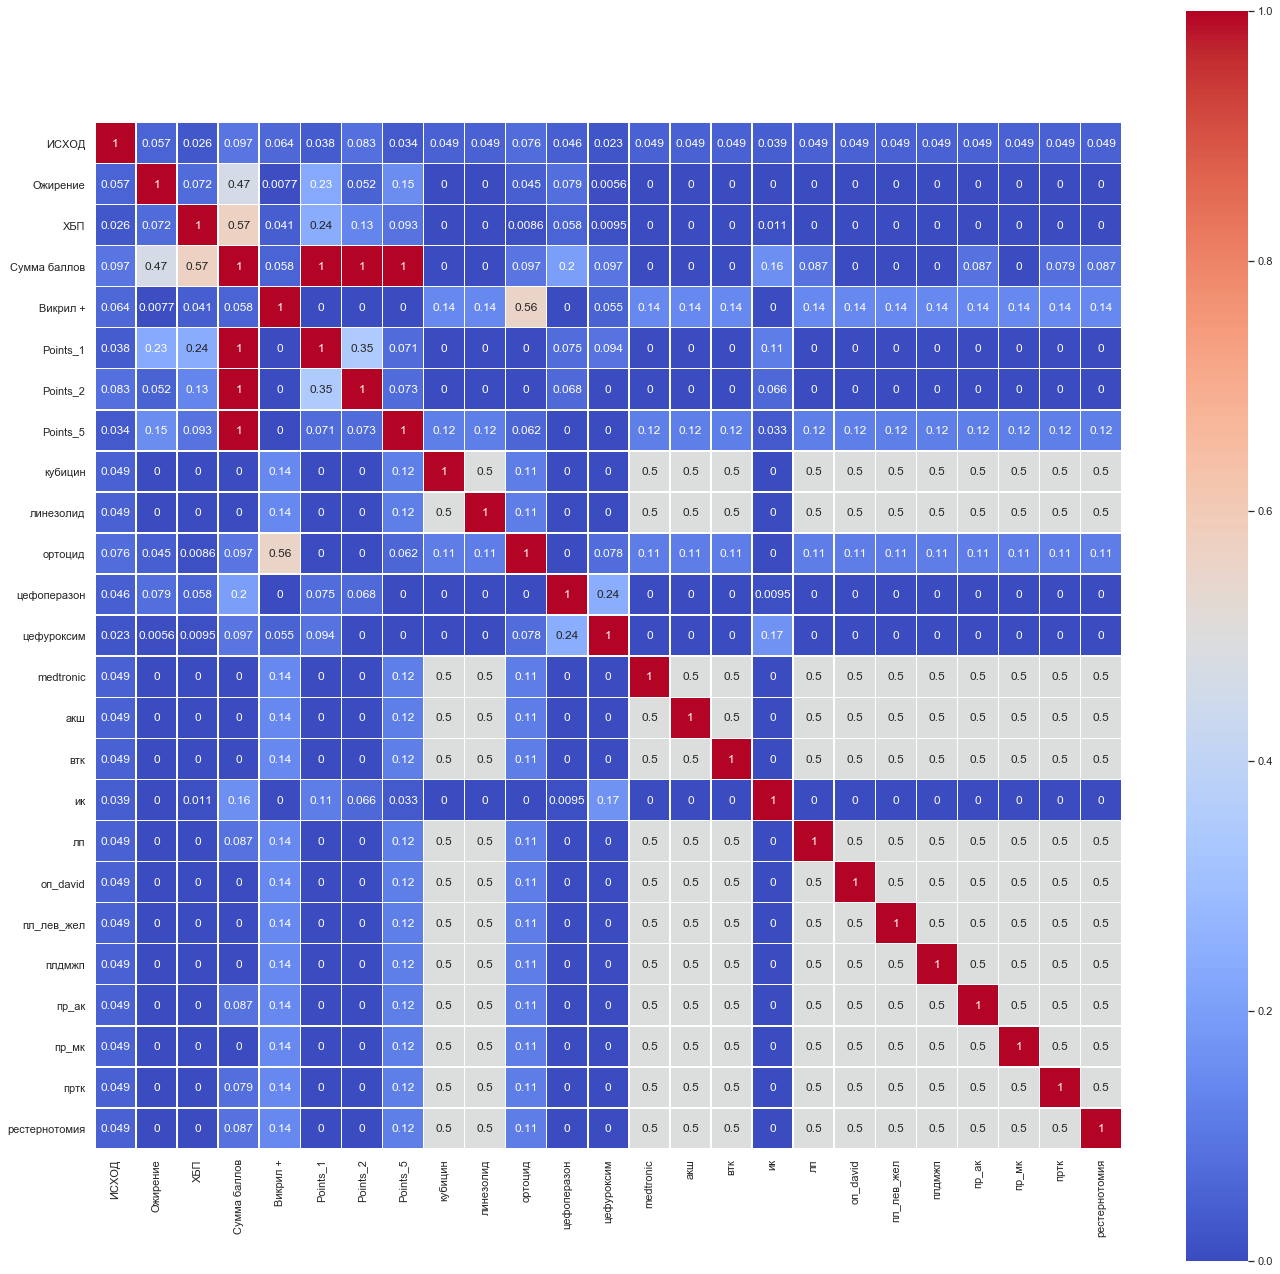

In [68]:
corr_adj = corr.loc[corr['ИСХОД']>0, corr.loc['ИСХОД',:]>0]

plt.figure(figsize=(23,23))
plt.title = 'Correlation of features'
sns.heatmap(corr_adj,annot=True,linewidth = 0.5, cmap='coolwarm', square=True)

In [65]:
corr.loc[:, corr.loc['ИСХОД',:]>0]

,ИСХОД,Ожирение,ХБП,Сумма баллов,Викрил +,Points_1,Points_2,Points_5,кубицин,линезолид,ортоцид,цефоперазон,цефуроксим,medtronic,акш,втк,ик,лп,оп_david,пл_лев_жел,плдмжп,пр_ак,пр_мк,пртк,рестернотомия
ИСХОД,1.000000,0.056567,0.025612,0.097288,0.063620,0.037742,0.083447,0.033636,0.049178,0.049178,0.075980,0.045696,0.022851,0.049178,0.049178,0.049178,0.039326,0.049178,0.049178,0.049178,0.049178,0.049178,0.049178,0.049178,0.049178
Ургентные операции,0.000000,0.000000,0.000000,0.278044,0.000000,0.106670,0.000000,0.161157,0.013211,0.013211,0.000000,0.052440,0.066527,0.013211,0.013211,0.013211,0.053229,0.013211,0.013211,0.013211,0.013211,0.013211,0.013211,0.013211,0.013211
Ожирение,0.056567,1.000000,0.072279,0.465617,0.007695,0.232209,0.052365,0.152839,0.000000,0.000000,0.044911,0.078686,0.005589,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Сахарный диабет,0.000000,0.214373,0.218344,0.563761,0.105897,0.331547,0.079714,0.124400,0.000000,0.000000,0.065193,0.146964,0.126160,0.000000,0.000000,0.000000,0.054614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ХБП,0.025612,0.072279,1.000000,0.568347,0.040988,0.238795,0.133305,0.093395,0.000000,0.000000,0.008566,0.057581,0.009524,0.000000,0.000000,0.000000,0.011472,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
репмк,0.000000,0.000000,0.000000,0.000000,0.067604,0.000000,0.000000,0.050595,0.284192,0.284192,0.047076,0.056732,0.000000,0.284192,0.284192,0.284192,0.000000,0.284192,0.284192,0.284192,0.284192,0.284192,0.284192,0.284192,0.284192
рестернотомия,0.049178,0.000000,0.000000,0.086932,0.141306,0.000000,0.000000,0.117856,0.497967,0.497967,0.113338,0.000000,0.000000,0.497967,0.497967,0.497967,0.000000,0.497967,0.497967,0.497967,0.497967,0.497967,0.497967,0.497967,1.000000
супракор_прот,0.000000,0.000000,0.031358,0.095153,0.000000,0.000000,0.104298,0.000000,0.149154,0.149154,0.000000,0.000000,0.163466,0.149154,0.149154,0.149154,0.081084,0.149154,0.149154,0.149154,0.149154,0.149154,0.149154,0.149154,0.149154
т-графт,0.000000,0.000000,0.042920,0.285665,0.000000,0.135033,0.000000,0.098615,0.036266,0.036266,0.000000,0.000000,0.000000,0.036266,0.036266,0.036266,0.258845,0.036266,0.036266,0.036266,0.036266,0.036266,0.036266,0.036266,0.036266
